<h1 align='center'>ML with Sci-Kit Learn</h1>

<h2>Table of contents</h2>
<ol>
    <li><a href='#5'>Scikit-learn</a></li>
    <li><a href='#1'>Linear Regression</a></li>
    <li><a href='#3'>Logistic regression</a></li>
    <li><a href='#6'>References</a></li>
</ol>

<a id='5'></a>
## Scikit-learn

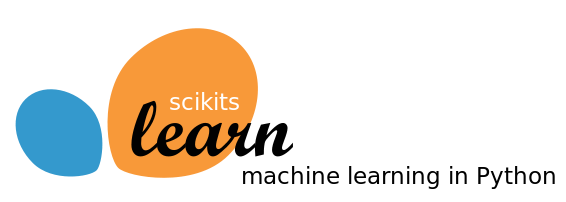

* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

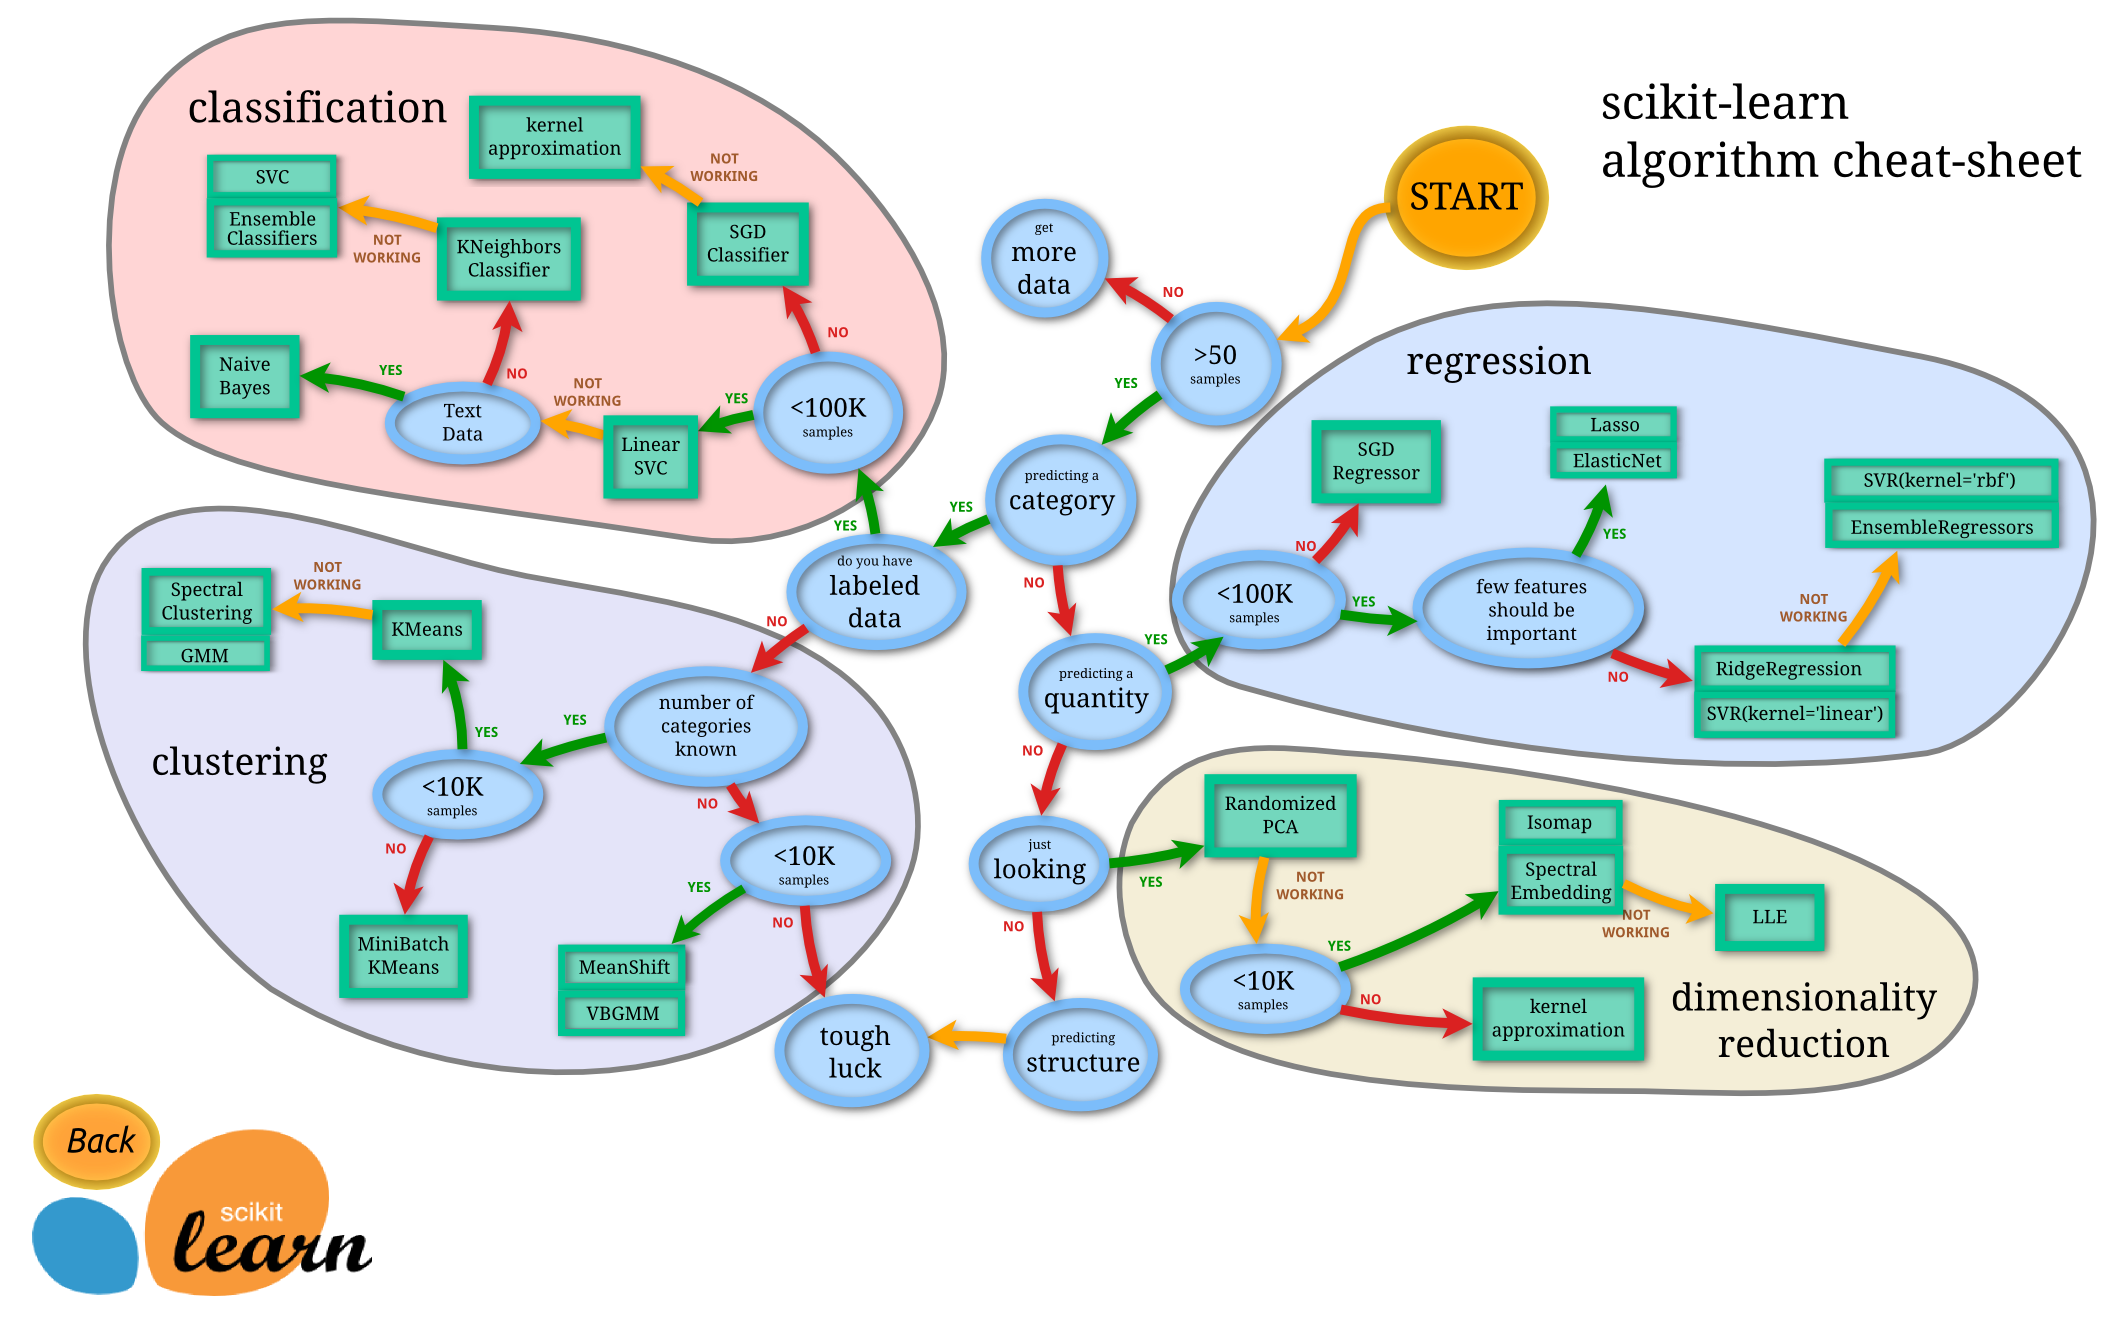

<a id='1'></a>
## Linear Regression

We will be working with automobile dataset provided by <a href='https://archive.ics.uci.edu/ml/datasets/Automobile'>UCI</a>. This dataset has a lot of features and instead of looking at them all, we will select only a few important ones for simplicity.

In [1]:
# Let's load the data into python and take a look at it
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Loading entire dataset
dataset = pd.read_csv('data/car_data.txt', names=['symboling','normalized_losses','make','fuel_type','aspiration',
                                             'num_of_doors','body_style','drive_wheels','engine_location',
                                             'wheel_base','length','width','height','curb_weight','engine_type',
                                             'num_of_cylinders','engine_size','fuel_system','bore','stroke',
                                             'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg',
                                             'price'], index_col=None)

# Select few important columns
dataset = dataset[['make', 'engine_size', 'horsepower', 'price']]

As we can see below, our dataset has four columns:

* make: car company
* engine_size: size of the engine
* horsepower: horsepower
* price: price of the car

In [2]:
dataset.head()

make  engine_size horsepower  price
0  alfa-romero          130        111  13495
1  alfa-romero          130        111  16500
2  alfa-romero          152        154  16500
3         audi          109        102  13950
4         audi          136        115  17450

In [3]:
# Taking a deeper look, we can see that we have missing values denoted as '?' in our dataset
# For example, in the example below, you can see that last row has a price of '?' which doesn't make sense.
dataset[:10]

make  engine_size horsepower  price
0  alfa-romero          130        111  13495
1  alfa-romero          130        111  16500
2  alfa-romero          152        154  16500
3         audi          109        102  13950
4         audi          136        115  17450
5         audi          136        110  15250
6         audi          136        110  17710
7         audi          136        110  18920
8         audi          131        140  23875
9         audi          131        160      ?

In [4]:
# Let's remove these '?' values from our dataset entirely
import numpy as np
dataset = dataset.replace('?', np.nan)

# Let's drop any null values
dataset = dataset.dropna()

Now, we are going to plot to scatter plots to see if there is any obvious relationship between our independent variables (features) and price. Of course, we can't plot 'make' so we will only focus on engine_size and horsepower.

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 4 columns):
make           199 non-null object
engine_size    199 non-null int64
horsepower     199 non-null object
price          199 non-null object
dtypes: int64(1), object(3)
memory usage: 17.8+ KB


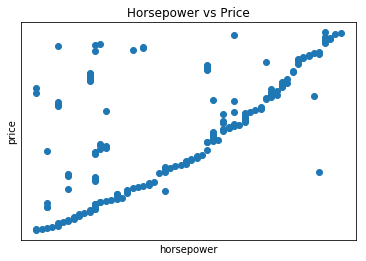

In [44]:
# As we can see from the scatter plot below, there seems to be a linear relationship between horsepower and price.
# This makes sense because a car with higher horsepower is usually more expensive. 
plt.scatter(dataset.horsepower, dataset.price)
plt.title('Horsepower vs Price')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.xticks([])
plt.yticks([])
plt.show()

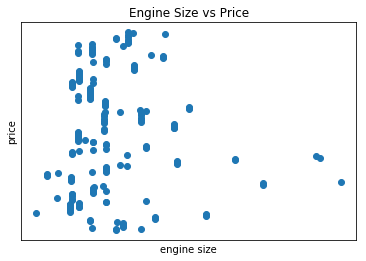

In [45]:
# The graph below also shows that there is a linear relationship between engine size. 
# We can see that as the engine size increases, the price also goes up. 
plt.scatter(dataset.engine_size, dataset.price)
plt.title('Engine Size vs Price')
plt.xlabel('engine size')
plt.ylabel('price')
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

**Splitting the dataset into training and testing set**
* Let's split our dataset into training and testing sets so that we can build our model using the training set and then evaluate its performance against the testing set.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

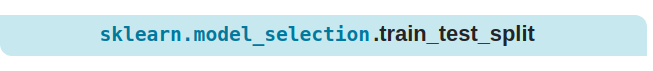

* Split arrays or matrices into random train and test subsets

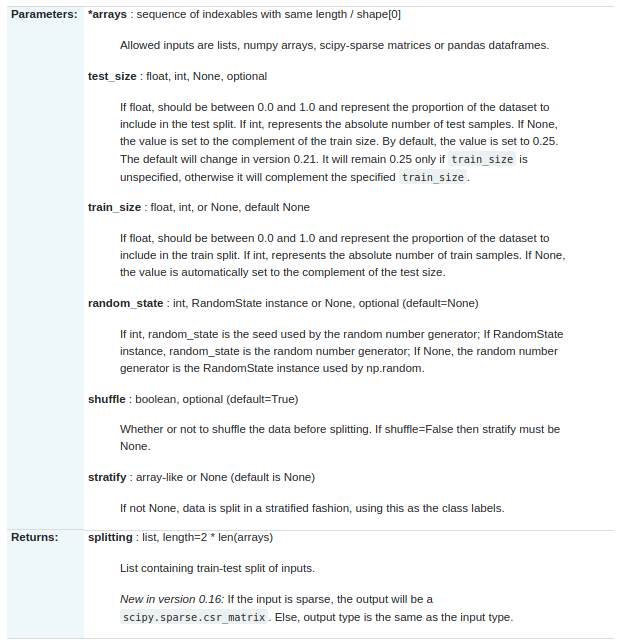

**Building the model**
* We will now train our model using the training dataset. This part of the code is exactly the same as simple linear regression model which is convenient.

In [48]:
# Training our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting values using our trained model
y_pred = regressor.predict(X_test)

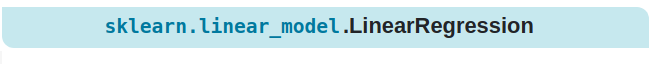

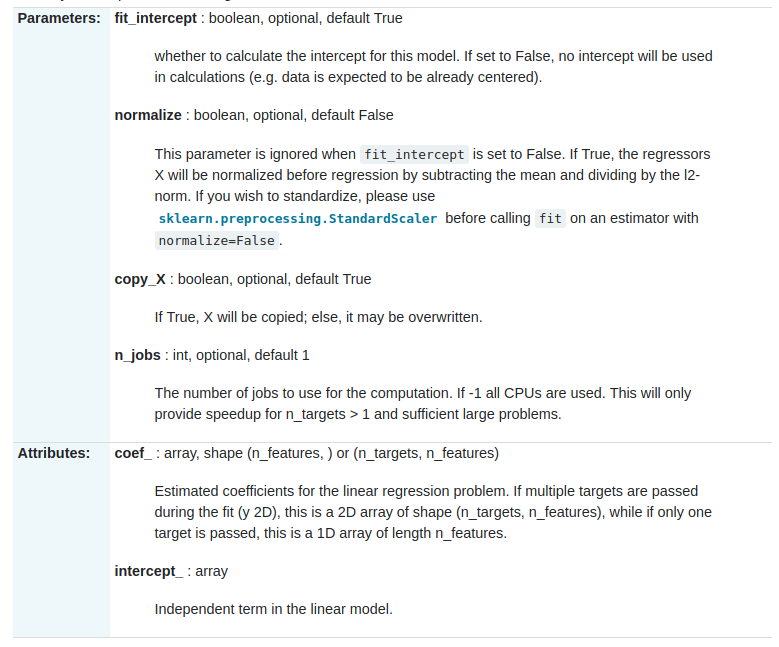

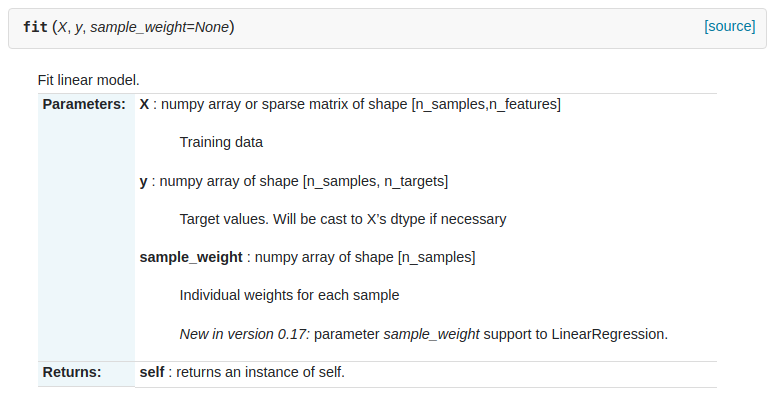

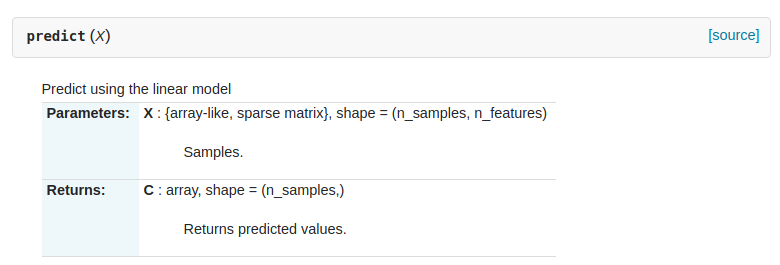

In [49]:
# Let's look at the output of y_test and y_pred
y_test

array([ 5389, 11845,  8558,  9995, 11850, 12290, 12764, 13845,  7463,
        7898,  8499,  8249, 13645, 13499, 13860, 41315,  5195,  6849,
        6575,  6479,  7053, 11199,  6669, 36000,  7895, 13495,  8845,
        8778, 19045, 10198, 15040, 12170, 18420,  9549, 34184, 18280,
       18920, 32250, 17199, 11259])

In [50]:
# Let's convert all values to integers for better comparison
y_pred.astype(int)

array([ 5389, 11845,  8558,  9995, 11850, 12290, 12763, 13845,  7463,
        7898,  8498,  8249, 13645, 13498, 13859, 41315,  5195,  6849,
        6575,  6479,  7053, 11198,  6669, 35999,  7895, 13495,  8844,
        8778, 19045, 10198, 15040, 12170, 18420,  9549, 34183, 18280,
       18920, 32249, 17198, 11259])

<a id='3'></a>
## Logistic Regression on Digits Dataset

**Loading the Data (Digits Dataset)**
* The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()

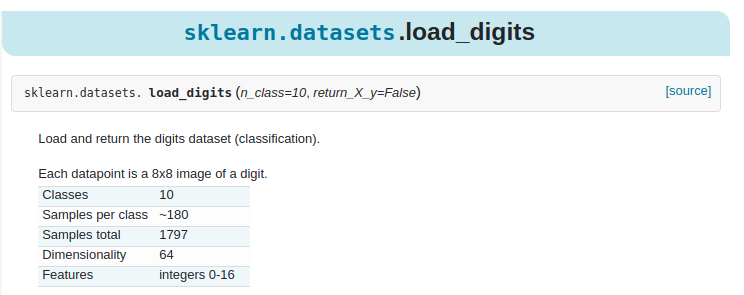

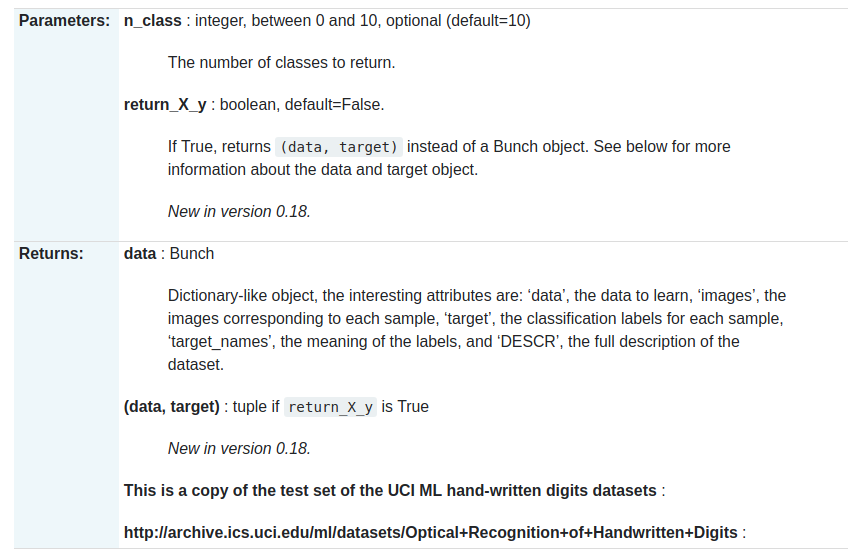

In [52]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0â€“9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


* To see that there are 1797 images and 1797 labels in the dataset

**Showing the Images and the Labels (Digits Dataset)**
* This section is really just to show what the images and labels look like. It usually helps to visualize your data to see what you are working with.

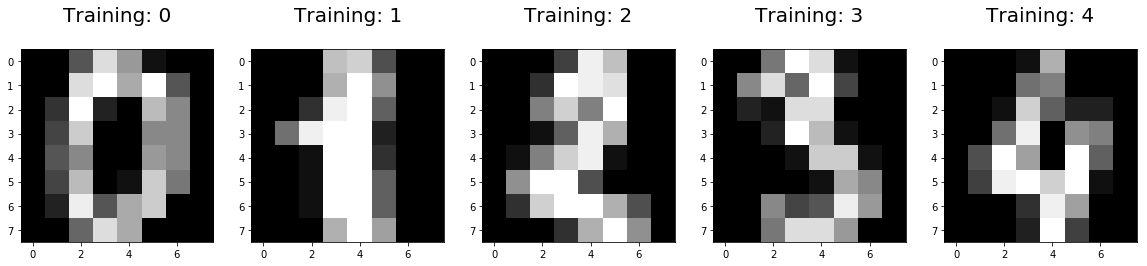

In [53]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

**Splitting Data into Training and Test Sets (Digits Dataset)**
* We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

**Scikit-learn 4-Step Modeling Pattern**
* **Step 1.** Import the model you want to use

In [55]:
from sklearn.linear_model import LogisticRegression

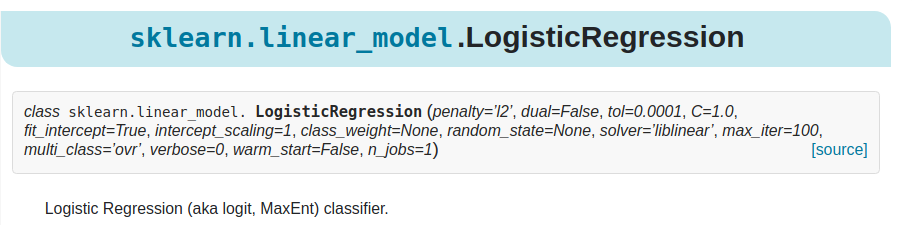

* **Step 2.** Make an instance of the Model

In [56]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

* **Step 3.** Training the model on the data, storing the information learned from the data

In [57]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

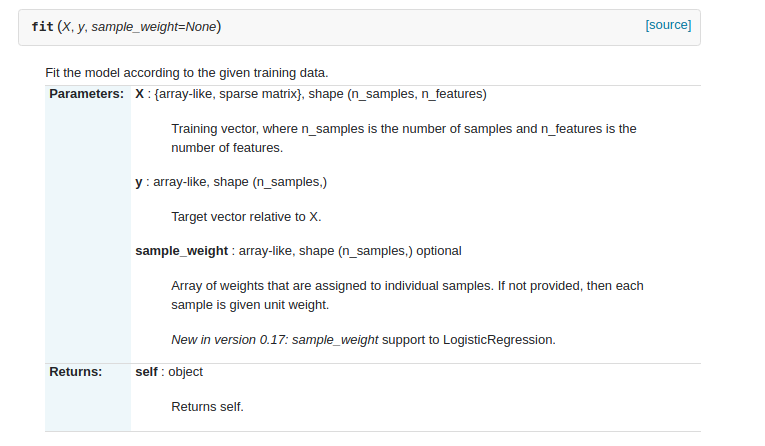

* **Step 4.** Predict labels for new data (new images)

In [58]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

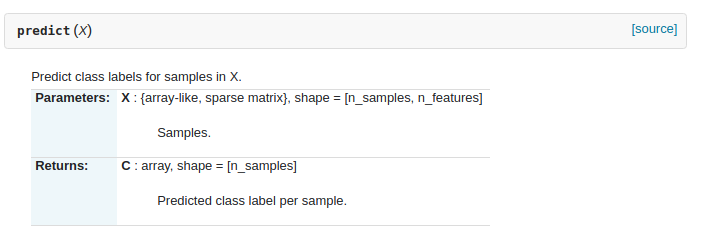

* Make predictions on entire test data

In [59]:
predictions = logisticRegr.predict(x_test)

In [60]:
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 1,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 1, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 1, 4, 2, 1, 6, 9, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [61]:
y_test

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

**Measuring Model Performance**

* While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. 
* To do this are going to see how the model performs on the new data (test set)

* Accuracy is defined as:

    (fraction of correct predictions): correct predictions / total number of data points

In [62]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


**Our accuracy was 95.3%.**

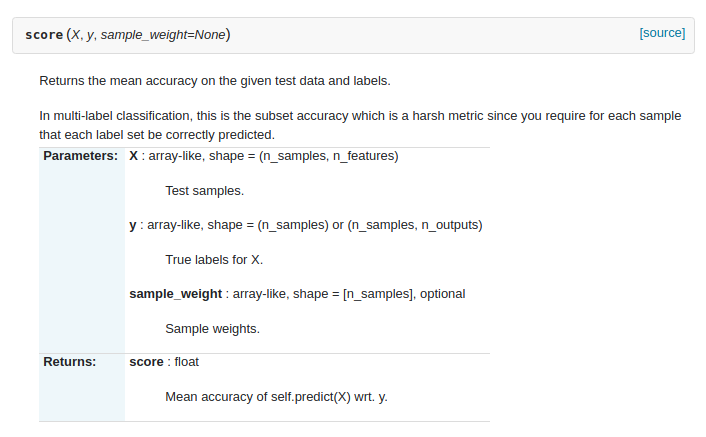

**F-score**

* Precision and recall
* In statistical analysis of binary classification, the F score (also F-score or F-measure) is a measure of a test's accuracy.

* It considers both the precision p and the recall r of the test to compute the score: 
    * p is the number of correct positive results divided by the number of all positive results returned by the classifier, and 
    * r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). 

* The F score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

* The traditional F-measure or balanced F-score is the harmonic mean of precision and recall:

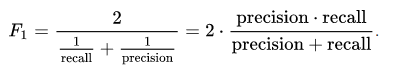

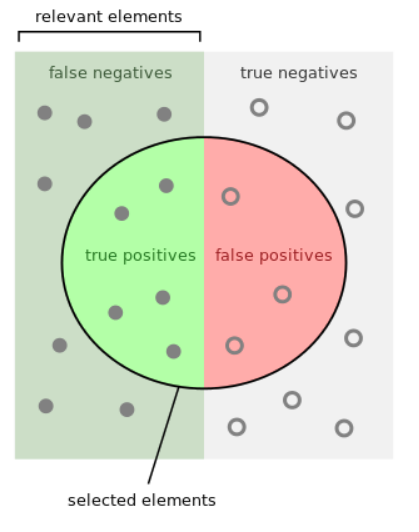

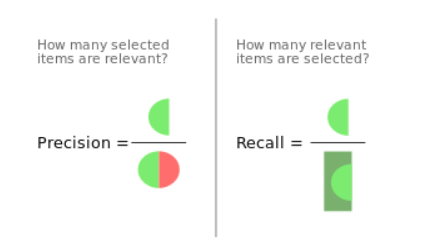

<a id='6'></a>
## References

* http://scikit-learn.org/stable/
* http://www.enlistq.com/implementing-multivariate-linear-regression-model-python/#Preprocessing-the-dataset
* https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
